# Model Selection

Now we are going to discuss optimizing hyperparameters. It will also explore the issue of whether the model requires more data to perform better.

## Validation Curve

Creating a validation curve is one way to determine an appropriate value for a hyperparameter. A validation curve is a plot that shows how the model performance responds to changes in the hyperparamter's value. The chart shows both the training data and the validation data. The validation scores allow us to infer how the model would respond to unseen data. Typically, we would choose a hyperparameter that maximizes the validation score.

In the following example, we will use Yellowbrick to see if chainging the value of the `max_depth` hypterparamter changes the model performance of a random forest. you can provide a `scoring` parameter set to a scikit-learn model metric:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
X_train = pd.read_csv('data/titanic_X_train.csv')
X_test = pd.read_csv('data/titanic_X_test.csv')
y_train = pd.read_csv('data/titanic_y_train.csv')['survived']
y_test = pd.read_csv('data/titanic_y_test.csv')['survived']

In [11]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [12]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


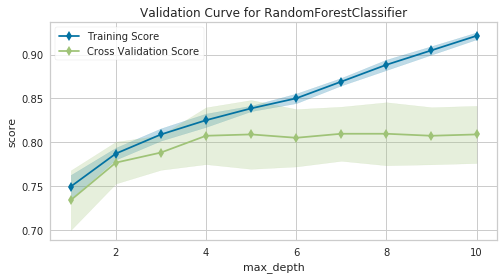

In [7]:
plt.figure(figsize=(8,4))
vc_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                        param_name="max_depth",
                        param_range=np.arange(1,11),
                        cv=10,
                        n_jobs=-1)
vc_viz.fit(X,y)
vc_viz.poof();

The `ValidationCurve` class support a `scoring` parameter. The parameter can be a custom function or mone of the following options, depnding on the task. 

## Learning Curve

To select the best model for your project, how much data do you need?

A learning curve can help answer that question. The following curve plots the training and cross-validation score as we create models with more samples. If the cross-validation continues to rise that could indicate that more data would help the model perform better. 

The following figure shows a validation curve and also helps to explore bias and variance in our model. If there is variability (a large shaded area) in the training score, then the model suffers from bias error and is too simple (underfit). If there is variability in the cross-validated score, then the model suffers from variance error and is too complicated (overfit). Another indication that the model is overfit is that the performance of the validation set is much worse than the training set. 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


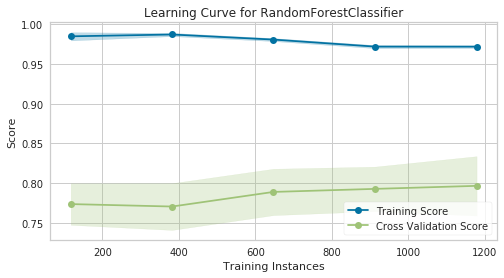

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
lc3_viz = LearningCurve(RandomForestClassifier(n_estimators=100),cv=10)
lc3_viz.fit(X,y)
lc3_viz.poof()

This visualization can be used for regression or clustering by changing the scoring options. 